# <ins> Predicting traffic jams and visualising fastest route <ins>

## Table of Contents


* [Phase 1: Proposal](#Phase-1:-Proposal)
* [Phase 2: Provisioning](#Phase-2:-Provisioning)
    * [2.1 Data Requirements](#2.1-Data-Requirements)
        * [2.1.1 Domains](#2.1.1-Domains)
        * [2.1.2 Stakeholders](#2.1.2-Stakeholders)
        * [2.1.3 Facts](#2.1.3-Facts)
        * [2.1.4 Dimensions](#2.1.4-Dimensions)
        * [2.1.5 Candidate Data Sources](#2.1.5-Candidate-Data-Sources)
    * [2.2 Data Collection](#2.2-Data-Collection)
        * [2.2.1 Where do we store our data?](#2.2.1-Where-do-we-store-our-data?)
        * [2.2.2 How and how often do we want to retrieve the data?](#2.2.2-How-and-how-often-do-we-want-to-retrieve-the-data?)
    * [2.3 Data Understanding](#2.3-Data-Understanding)
        * [2.3.1 Traffic jam data](#2.3.1-Traffic-jam-data)
        * [2.3.2 Weather data](#2.3.2-Weather-data)
    * [2.4 Data Preperation](#2.4-Data-Preperation)
        * [2.4.1 Cleaning Weather Data](#2.4.1-Cleaning-Weather-Data)
        * [2.4.2 Cleaning Traffic Jam Data](#2.4.2-Cleaning-Traffic-Jam-Data)
        * [2.4.3 Combining the Datasets](#2.4.3-Combining-the-Datasets)
        * [2.4.4 Making the Classes](#2.4.4-Making-the-Classes)
    * [2.5 Visualizing fastest route](#2.5-Visualizing-fastest-route)
        * [2.5.1 Filtering on Customer Route](#2.5.1-Filtering-on-Customer-Route)
* [Phase 3: Predictions](#Phase-3:-Predictions)   
    * [3.1 Preprocessing](#3.1-Preprocessing)
        * [3.1.1 Feature Selection](#3.1.1-Feature-Selection)
        * [3.1.2 Assigning the features](#3.1.2-Assigning-the-features)
    * [3.2 Modelling](#3.2-Modelling)
        * [3.2.1 Random Forest](#3.2.1-Random-Forest)

## Phase 1: Proposal

See document: *JUGO Research Proposal*

## Phase 2: Provisioning

### 2.1 Data Requirements

- The dataset needs to be updated until at least 2020.
- The dataset needs to have locations from Noord-Holland to Haarlem and everything below in the Netherlands.
- The dataset needs to contain information from where traffic jams occur in between the assigned locations.
- The dataset needs to have GPS data.
- The dataset needs to have information about accidents which happened on the highway.
- The dataset needs to contain only A and N roads, not the regular roads inside the city


1. We need data for our focus-area. The focussed area of our project is, trace a line between The Hague and Arnhem and everything below that (in the Netherlands). We chose this area because JUGO works in this area. Since we are making this project for them, it would be illogical to choose a different area.

2. We want to separate our data into seasons to find out if there is any difference/link between seasons. (for example more traffic jams in summer because everyone will go to the beach)

3. It should also include some indication of time. So for example the duration of the traffic jam.


#### 2.1.1 Domains

We need the traffic data of the area where JUGO operates. This is the area below the Hague between the Hague and Arnhem. The data also needs to be recent to make a decent prediction, so we need data from 2020 and 2021. The data also needs to be from days and times JUGO employees work. This is from Monday to Friday, from 6 am to 8 pm.
We are interested in predicting the fastest route, so the data needs to provide an account of traffic jams.


#### 2.1.2 Stakeholders

JUGO employees, because the better the data, the better the predictions, the more traffic jams they will avoid.

#### 2.1.3 Facts

The facts we need are:
- The road of a traffic jam
- The coordinates of the traffic jam
- The date and time of the traffic jam

#### 2.1.4 Dimensions

The dimensions we need are:
- The amount of traffic jams on a specific day
- The amount of traffic jams per month
- The average amount of traffic jam on every hour of the day

#### 2.1.5 Candidate Data Sources 

Right now we are planning to start using just the ANWB traffic jam data. If we get everything to work, we would like to use other data sources as well.

<ins> KNMI Data <ins>

KNMI has weather data. We can try to look for correlations between weather and traffic jams, to improve the accuracy.    

<ins> ANWB Roadblock Data <ins>

ANWB data also includes roadblock data. We could use this in the future as well to look for correlations but this is more of an extra.

### 2.2 Data Collection

In this project, multiple data sources are used: *traffic jam data*, *hectometer data* and *weather data*. In this section, the data will be loaded and described.

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns
from calendar import day_name
from pandas.api.types import CategoricalDtype
import numpy as np

jams = pd.read_csv('A2jams.csv')
jams.head()

,Year,Month,Day,Hour,Minute,Day_of_week,JamDuration,RouteDesc,start,end,...,TailLatitude,HectometerHead,HectometerTail,DateJamStart,Jam,AvgLength,Cause_1,Cause_3,Weekday,Season
0,2022,11,30,16,21,2,0.0,A2,1669821691,1669822380,...,50.755639,30.6,272.7,2022-11-30,0,NaN,NaN,NaN,NaN,Autumn
1,2022,11,30,12,56,2,0.0,A2,1669809391,1669821540,...,50.755639,30.6,272.7,2022-11-30,0,NaN,NaN,NaN,NaN,Autumn
2,2022,11,30,12,15,2,0.0,A2,1669806932,1669808940,...,50.755639,30.6,272.7,2022-11-30,0,NaN,NaN,NaN,NaN,Autumn
3,2022,11,30,9,26,2,0.0,A2,1669796791,1669804380,...,50.755639,30.6,272.7,2022-11-30,0,NaN,NaN,NaN,NaN,Autumn
4,2022,11,30,6,55,2,0.0,A2,1669787735,1669787760,...,50.755639,30.6,272.7,2022-11-30,0,NaN,NaN,NaN,NaN,Autumn


In [2]:
weather = pd.read_csv('weather.csv')
weather.head()

,time,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
1,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
2,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
3,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
4,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]


#### 2.2.1 Where do we store our data?

For now we store the data locally. If it needs to be shared among the group, we use google drive to share it. Here we also have a backup of the data. 

#### 2.2.2 How and how often do we want to retrieve the data?

We will only load the data once. We want to realise our project by making predictions based on past data. Since the data isn’t up to data we don’t need to retrieve it. If our current data isn’t enough we will look for additional data.

### 2.3 Data Understanding

We got the data in a huge tabular form. To understand it, we analyzed every single column there is.

#### 2.3.1 Traffic jam data

Here are the definitions for each variable in the dataset:

<table style="border: 1px solid black;">
  <tr>
    <th>Variable</th>
    <th>Defintion</th>
  </tr>
  <tr>
    <td>DateJamStart</td>
    <td>Date the traffic jam starts</td>
  </tr>
  <tr>   
    <td>AvgLength</td>
          <td>Average length of traffic jam</td>
    <td></td>
        </tr>
  <tr>   
    <td>JamDuration</td>
          <td>Duration of the traffic jam</td>
        </tr>
  <tr>   
    <td>RouteDesc</td>
          <td>Description of the route?</td>
        </tr>
  <tr>   
    <td>Cause_1</td>
          <td>Traffic jam cause 1</td>
        </tr>
  <tr>   
    <td>Cause_3</td>
          <td>Traffic jam cause 3</td>
        </tr>
  <tr>   
    <td>HectoLetter</td>
          <td>Side of the hectometerpole (left or right)</td>
        </tr>
  <tr>   
    <td>HeadLongitude</td>
          <td>Start traffic jam x-coordinate</td>
        </tr>
  <tr>   
    <td>HeadLatitude</td>
                <td>Start traffic jam y-coordinate</td>
        </tr>
  <tr>   
    <td>TailLongitude</td>
      <td>End traffic jam x-coordinate</td>
        </tr>
  <tr>   
    <td>TailLatitude</td>
      <td>End traffic jam y-coordinate</td>
        </tr>
  <tr>   
    <td>Year</td>
      <td>Year of the traffic jam</td>
        </tr>
  <tr>   
    <td>Month</td>
      <td>Month of the traffic jam</td>
        </tr>
  <tr>   
    <td>Day</td>
      <td>Day of the traffic jam</td>
        </tr>
  <tr>   
    <td>Minute</td>
      <td>Minute of the traffic jam</td>
        </tr>
  <tr>   
    <td>Day_of_week</td>
      <td>Day of the week when the traffic jam took place</td>
        </tr>
  <tr>   
    <td>Season</td>
      <td>Season when the traffic jam took place</td>
        </tr>
  <tr>   
    <td>Weekday</td>
            <td>Day of the week when the traffic jam took place</td>
  </tr>
</table>

In [3]:
jams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33854 entries, 0 to 33853
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            33854 non-null  int64  
 1   Month           33854 non-null  int64  
 2   Day             33854 non-null  int64  
 3   Hour            33854 non-null  int64  
 4   Minute          33854 non-null  int64  
 5   Day_of_week     33854 non-null  int64  
 6   JamDuration     33854 non-null  float64
 7   RouteDesc       33854 non-null  object 
 8   start           33854 non-null  int64  
 9   end             33854 non-null  int64  
 10  HectoLetter     33854 non-null  object 
 11  HeadLongitude   33854 non-null  float64
 12  HeadLatitude    33854 non-null  float64
 13  TailLongitude   33854 non-null  float64
 14  TailLatitude    33854 non-null  float64
 15  HectometerHead  33854 non-null  float64
 16  HectometerTail  33854 non-null  float64
 17  DateJamStart    33854 non-null 

#### 2.3.2 Weather data

Here are the definitions for each variable in the dataset:

<table style="border: 1px solid black;">
  <tr>
    <th>Variable</th>
    <th>Defintion</th>
  </tr>
  <tr>
    <td>time</td>
    <td>time</td>
  </tr>
  <tr>   
    <td>temperature_2m_max</td>
          <td>Maximum daily air temperature at 2 meters above ground</td>
    <td></td>
        </tr>
  <tr>   
    <td>temperature_2m_min</td>
          <td>Minimum daily air temperature at 2 meters above ground</td>
        </tr>
  <tr>   
    <td>apparent_temperature_max</td>
          <td>Maximum daily apparent temperature</td>
        </tr>
  <tr>   
    <td>apparent_temperature_min</td>
          <td>Minimum daily apparent temperature</td>
        </tr>
  <tr>   
    <td>sunrise</td>
          <td>Sunrise times</td>
        </tr>
  <tr>   
    <td>sunset</td>
          <td>Sunset times</td>
        </tr>
  <tr>   
    <td>shortwave_radiation_sum</td>
          <td>The sum of solar radiaion on a given day in Megajoules</td>
        </tr>
  <tr>   
    <td>precipitation_sum</td>
                <td>Sum of daily precipitation (including rain, showers and snowfall)</td>
        </tr>
  <tr>   
    <td>rain_sum</td>
      <td>Sum of daily rain</td>
        </tr>
  <tr>   
    <td>snowfall_sum</td>
      <td>Sum of daily snowfall</td>
        </tr>
  <tr>   
    <td>precipitation_hours</td>
      <td>The number of hours with rain</td>
        </tr>
  <tr>   
    <td>windspeed_10m_max</td>
      <td>	Maximum wind speed on a day</td>
        </tr>
  <tr>   
    <td>windgusts_10m_max</td>
      <td>Maximum gusts on a day</td>
        </tr>
  <tr>   
    <td>winddirection_10m_dominant</td>
      <td>Dominant wind direction</td>
        </tr>
  <tr>   
    <td>et0_fao_evapotranspiration</td>
      <td>Daily sum of ET₀ Reference Evapotranspiration of a well watered grass field</td>
        </tr>
</table>

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38057 entries, 0 to 38056
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   time                        38057 non-null  object
 1   temperature_2m_max          38057 non-null  object
 2   temperature_2m_min          38057 non-null  object
 3   apparent_temperature_max    38057 non-null  object
 4   apparent_temperature_min    38057 non-null  object
 5   sunrise                     38057 non-null  object
 6   sunset                      38057 non-null  object
 7   shortwave_radiation_sum     38057 non-null  object
 8   precipitation_sum           38057 non-null  object
 9   rain_sum                    38057 non-null  object
 10  snowfall_sum                38057 non-null  object
 11  precipitation_hours         38057 non-null  object
 12  windspeed_10m_max           38057 non-null  object
 13  windgusts_10m_max           38057 non-null  ob

### 2.4 Data Preperation

All the data has been collected, so in this section the data will be cleaned up so that it is usable for the machine learning part.

#### 2.4.1 Cleaning Weather Data

In [5]:
weather.head()

,time,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
1,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
2,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
3,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]
4,['2022-11-30'],[8.0],[4.0],[5.6],[1.2],['2022-11-30T08:24'],['2022-11-30T16:34'],[3.06],[0.0],[0.0],[0.0],[0.0],[10.5],[14.8],[58],[0.3]


Above you can see that the data is not easily readable because it is all with straight brackets. Therefore, they are removed below.

In [6]:
weather = weather.replace({']':''}, regex=True)
weather = weather.replace({'\[':''}, regex=True)
weather = weather.replace({'\'':''}, regex=True)
weather.head()

,time,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,2022-11-30,8.0,4.0,5.6,1.2,2022-11-30T08:24,2022-11-30T16:34,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58,0.3
1,2022-11-30,8.0,4.0,5.6,1.2,2022-11-30T08:24,2022-11-30T16:34,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58,0.3
2,2022-11-30,8.0,4.0,5.6,1.2,2022-11-30T08:24,2022-11-30T16:34,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58,0.3
3,2022-11-30,8.0,4.0,5.6,1.2,2022-11-30T08:24,2022-11-30T16:34,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58,0.3
4,2022-11-30,8.0,4.0,5.6,1.2,2022-11-30T08:24,2022-11-30T16:34,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58,0.3


In [7]:
weather = weather.mask(weather.eq('None')).dropna()

To make the weather data usable by the machine learning algorithm, it must be converted to the appropriate data types.

In [8]:
weather['time'] = weather['time'].astype('datetime64[ns]')
weather['sunrise'] = weather['sunrise'].astype('datetime64[ns]')
weather['sunset'] = weather['sunset'].astype('datetime64[ns]')

weather['temperature_2m_max'] = weather['temperature_2m_max'].astype('float')
weather['temperature_2m_min'] = weather['temperature_2m_min'].astype('float')
weather['apparent_temperature_max'] = weather['apparent_temperature_max'].astype('float')
weather['apparent_temperature_min'] = weather['apparent_temperature_min'].astype('float')
weather['shortwave_radiation_sum'] = weather['shortwave_radiation_sum'].astype('float')
weather['precipitation_sum'] = weather['precipitation_sum'].astype('float')
weather['rain_sum'] = weather['rain_sum'].astype('float')
weather['snowfall_sum'] = weather['snowfall_sum'].astype('float')
weather['precipitation_hours'] = weather['precipitation_hours'].astype('float')
weather['windspeed_10m_max'] = weather['windspeed_10m_max'].astype('float')
weather['windgusts_10m_max'] = weather['windgusts_10m_max'].astype('float')
weather['winddirection_10m_dominant'] = weather['winddirection_10m_dominant'].astype('float')
weather['et0_fao_evapotranspiration'] = weather['et0_fao_evapotranspiration'].astype('float')

In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38040 entries, 0 to 38056
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        38040 non-null  datetime64[ns]
 1   temperature_2m_max          38040 non-null  float64       
 2   temperature_2m_min          38040 non-null  float64       
 3   apparent_temperature_max    38040 non-null  float64       
 4   apparent_temperature_min    38040 non-null  float64       
 5   sunrise                     38040 non-null  datetime64[ns]
 6   sunset                      38040 non-null  datetime64[ns]
 7   shortwave_radiation_sum     38040 non-null  float64       
 8   precipitation_sum           38040 non-null  float64       
 9   rain_sum                    38040 non-null  float64       
 10  snowfall_sum                38040 non-null  float64       
 11  precipitation_hours         38040 non-null  float64   

#### 2.4.2 Cleaning Traffic Jam Data

Now that the weather data has been cleaned up, the file data can also be cleaned up. This data contains some after values and unnecessary commas. These should be removed or replaced. In addition, a file weight is created,class(duration * length).

In [10]:
jams['AvgLength'] = jams['AvgLength'].fillna(0)
jams['AvgLength'] = jams['AvgLength'].replace({',':''}, regex=True)

jams['AvgLength'] = jams['AvgLength'].astype('int')
jams['JamDuration'] = jams['JamDuration'].astype('int')

jams['JamClass'] = jams['AvgLength'] * jams['JamDuration']
jams['JamClass']

0                 0
1                 0
2                 0
3                 0
4                 0
            ...    
33849    1154235456
33850       8000000
33851      69000000
33852     321485780
33853      52785540
Name: JamClass, Length: 33854, dtype: int32

#### 2.4.3 Combining the Datasets

Now that all the data has been cleaned up, the traffic jam data can be merged with the weather data.

In [11]:
jams_and_weather = pd.concat([jams, weather], axis = 1)
jams_and_weather.drop('RouteDesc', axis = 1, inplace = True)
jams_and_weather

,Year,Month,Day,Hour,Minute,Day_of_week,JamDuration,start,end,HectoLetter,...,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,2022.0,11.0,30.0,16.0,21.0,2.0,0.0,1.669822e+09,1.669822e+09,R,...,2022-11-30 16:34:00,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58.0,0.30
1,2022.0,11.0,30.0,12.0,56.0,2.0,0.0,1.669809e+09,1.669822e+09,R,...,2022-11-30 16:34:00,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58.0,0.30
2,2022.0,11.0,30.0,12.0,15.0,2.0,0.0,1.669807e+09,1.669809e+09,R,...,2022-11-30 16:34:00,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58.0,0.30
3,2022.0,11.0,30.0,9.0,26.0,2.0,0.0,1.669797e+09,1.669804e+09,R,...,2022-11-30 16:34:00,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58.0,0.30
4,2022.0,11.0,30.0,6.0,55.0,2.0,0.0,1.669788e+09,1.669788e+09,R,...,2022-11-30 16:34:00,3.06,0.0,0.0,0.0,0.0,10.5,14.8,58.0,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-12-08 16:30:00,2.52,0.0,0.0,0.0,0.0,10.1,19.4,123.0,0.21
38053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-12-07 16:30:00,1.33,4.7,4.7,0.0,12.0,18.4,30.2,231.0,0.20
38054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-12-03 16:31:00,0.99,4.2,4.2,0.0,15.0,28.1,48.6,175.0,0.28
38055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-12-02 16:32:00,0.92,0.0,0.0,0.0,0.0,14.6,24.1,148.0,0.21


#### 2.4.4 Making the Classes

For the machine learning algorithm, we need a target variable. This is created below. A class is created beforehand.<br> This will be divided into 3 classes: No Traffic Jam, Small Traffic Jam, Big Traffic Jam. This will later allow us to determine which type or no traffic jam the user is going to encounter. 

In [12]:
conditions = [
    (jams_and_weather['JamClass'] == 0),
    (jams_and_weather['JamClass'] > 0) & (jams_and_weather['JamClass'] <= 10000000),
    (jams_and_weather['JamClass'] > 10000000)
    ]

values = ['No Traffic Jam', 'Small Traffic Jam', 'Big Traffic Jam']

jams_and_weather['JamClass'] = np.select(conditions, values)

jams_and_weather.sample(10)

,Year,Month,Day,Hour,Minute,Day_of_week,JamDuration,start,end,HectoLetter,...,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
31228,2021.0,9.0,29.0,16.0,33.0,2.0,116.0,1.632926e+09,1.632933e+09,R,...,2021-09-29 18:21:00,7.94,7.9,7.9,0.00,8.0,27.5,61.2,232.0,1.56
3741,2022.0,11.0,15.0,9.0,5.0,1.0,0.0,1.668500e+09,1.668500e+09,L,...,2022-11-15 16:50:00,2.63,5.1,5.1,0.00,9.0,23.2,42.8,287.0,0.64
23998,2022.0,6.0,20.0,13.0,50.0,0.0,7.0,1.655726e+09,1.655726e+09,R,...,2022-06-20 20:59:00,24.28,0.0,0.0,0.00,0.0,16.1,34.9,96.0,4.34
9353,2022.0,4.0,12.0,18.0,3.0,1.0,31.0,1.649779e+09,1.649781e+09,L,...,2022-04-12 19:33:00,16.15,6.1,6.1,0.00,7.0,17.1,36.4,313.0,3.20
26343,2022.0,6.0,28.0,8.0,42.0,1.0,16.0,1.656399e+09,1.656400e+09,L,...,2022-06-28 21:01:00,23.48,0.0,0.0,0.00,0.0,12.6,22.7,281.0,4.45
29753,2022.0,11.0,29.0,9.0,7.0,1.0,3.0,1.669709e+09,1.669709e+09,R,...,2022-11-29 16:35:00,2.19,0.0,0.0,0.00,0.0,10.2,15.5,155.0,0.26
7195,2022.0,9.0,28.0,7.0,46.0,2.0,5.0,1.664344e+09,1.664344e+09,R,...,2022-09-28 18:25:00,10.25,5.8,5.8,0.00,11.0,14.1,29.2,201.0,1.35
33095,2022.0,5.0,27.0,10.0,22.0,4.0,192.0,1.653640e+09,1.653651e+09,L,...,2022-05-27 20:38:00,20.27,2.7,2.7,0.00,7.0,23.6,46.4,171.0,3.84
34408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-11-28 16:36:00,2.71,2.6,2.6,0.00,9.0,17.3,27.7,244.0,0.30
3583,2021.0,2.0,8.0,10.0,14.0,0.0,0.0,1.612776e+09,1.612776e+09,R,...,2021-02-08 17:42:00,3.64,2.9,0.0,2.38,15.0,30.7,55.1,68.0,0.40


In [13]:
jams_and_weather.groupby(['JamClass'])['JamClass'].count()

JamClass
0                     4219
Big Traffic Jam      14324
No Traffic Jam        6154
Small Traffic Jam    13355
Name: JamClass, dtype: int64

As shown above there are 4 classes, this should be 3. The 0 should be added at No Traffic Jam. 

In [14]:
jams_and_weather['JamClass'] = jams_and_weather['JamClass'].replace({'0':'No Traffic Jam'}, regex=True)

In [15]:
jams_and_weather.groupby(['JamClass'])['JamClass'].count()

JamClass
Big Traffic Jam      14324
No Traffic Jam       10373
Small Traffic Jam    13355
Name: JamClass, dtype: int64

### 2.5 Visualizing fastest route 

In [16]:
import requests
import urllib.parse

JUGO_latitude = 51.692880
JUGO_longitude = 5.297720

street = str(input('To which street (+ number) are you travelling?: '))
place = str(input('To which place are you travelling?: '))

address = street + ', ' + place

url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

response = requests.get(url).json()
dest_latitude = response[0]["lat"]
dest_longitude = response[0]["lon"]

To which street (+ number) are you travelling?: De Run 7
To which place are you travelling?: Veldhoven



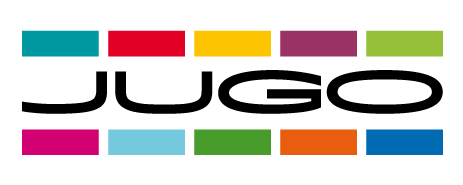

In [17]:
import openrouteservice
from openrouteservice import convert
import folium
import json

client = openrouteservice.Client(key='5b3ce3597851110001cf624800cde29c02534a258eb0d776169dee84')

coords = ((JUGO_longitude, JUGO_latitude), (dest_longitude, dest_latitude))
res = client.directions(coords)
geometry = client.directions(coords)['routes'][0]['geometry']
decoded = convert.decode_polyline(geometry)

distance_txt = "<h5> <b>Distance:&nbsp" + "<strong>"+str(round(res['routes'][0]['summary']['distance']/1000,1))+" km </strong>" +"</h5></b>"
duration_txt = "<h5> <b>Duration:&nbsp" + "<strong>"+str(round(res['routes'][0]['summary']['duration']/60,1))+" min. </strong>" +"</h5></b>"

m = folium.Map(location=[JUGO_latitude, JUGO_longitude],zoom_start=9, control_scale=True)
folium.GeoJson(decoded).add_child(folium.Popup(distance_txt+duration_txt,max_width=300)).add_to(m)


icon_url = 'JUGO_LOGO.png'
icon = folium.features.CustomIcon(icon_url, icon_size=(80, 60)) 

folium.Marker(
    location=list(coords[0][::-1]),
    icon=icon
).add_to(m)

folium.Marker(
    location=list(coords[1][::-1]),
    popup="Customer",
    icon=folium.Icon(color="green", icon='glyphicon glyphicon-briefcase'),
).add_to(m)


m.save('map.html')
m

#### 2.5.1 Filtering on Customer Route

In [18]:
dest_latitude = pd.to_numeric(dest_latitude, errors='coerce')
dest_longitude = pd.to_numeric(dest_longitude, errors='coerce')

In [19]:
jams_and_weather = jams_and_weather[(jams_and_weather['HeadLongitude'].between(JUGO_longitude, dest_longitude)) | (jams_and_weather['TailLongitude'].between(JUGO_longitude, dest_longitude))]
jams_and_weather

,Year,Month,Day,Hour,Minute,Day_of_week,JamDuration,start,end,HectoLetter,...,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
6190,2021.0,10.0,6.0,8.0,31.0,2.0,115.0,1.633502e+09,1.633509e+09,L,...,2021-10-06 18:06:00,6.75,9.1,9.1,0.0,15.0,26.8,50.0,247.0,1.00
6229,2022.0,11.0,18.0,16.0,13.0,4.0,17.0,1.668784e+09,1.668785e+09,L,...,2022-11-18 16:47:00,3.10,6.0,6.0,0.0,12.0,15.9,27.0,261.0,0.46
6239,2022.0,11.0,19.0,15.0,14.0,5.0,42.0,1.668867e+09,1.668870e+09,L,...,2022-11-19 16:45:00,2.86,2.6,2.6,0.0,10.0,17.8,34.2,20.0,0.45
6252,2022.0,5.0,6.0,13.0,50.0,4.0,39.0,1.651838e+09,1.651840e+09,L,...,2022-05-06 20:12:00,21.86,0.0,0.0,0.0,0.0,10.1,20.5,167.0,3.57
6260,2022.0,3.0,28.0,17.0,20.0,0.0,49.0,1.648481e+09,1.648484e+09,L,...,2022-03-28 19:06:00,16.61,0.0,0.0,0.0,0.0,10.7,22.0,66.0,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33847,2021.0,6.0,26.0,12.0,56.0,5.0,35.0,1.624705e+09,1.624707e+09,R,...,2021-06-26 21:02:00,20.64,1.1,1.1,0.0,5.0,11.8,24.5,86.0,3.94
33848,2021.0,10.0,8.0,16.0,20.0,4.0,8.0,1.633703e+09,1.633703e+09,R,...,2021-10-08 18:02:00,10.46,0.0,0.0,0.0,0.0,11.8,25.2,65.0,1.43
33849,2021.0,10.0,7.0,16.0,41.0,3.0,144.0,1.633618e+09,1.633626e+09,R,...,2021-10-07 18:04:00,8.05,0.1,0.1,0.0,1.0,9.0,16.6,329.0,1.20
33851,2021.0,6.0,18.0,15.0,32.0,4.0,23.0,1.624023e+09,1.624025e+09,L,...,2021-06-18 21:00:00,18.10,9.5,9.5,0.0,11.0,15.9,56.9,100.0,4.25


## Phase 3: Predictions

### 3.1 Preprocessing

In [20]:
from sklearn.preprocessing import LabelEncoder
for col in jams_and_weather.columns:
    le = LabelEncoder()
    jams_and_weather[col] = le.fit_transform(jams_and_weather[col])
jams_and_weather.head()

C:\Users\stenv\AppData\Local\Temp\ipykernel_29032\2544897769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jams_and_weather[col] = le.fit_transform(jams_and_weather[col])


,Year,Month,Day,Hour,Minute,Day_of_week,JamDuration,start,end,HectoLetter,...,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
6190,1,9,5,2,31,2,114,339,346,0,...,137,184,83,83,0,15,179,102,205,74
6229,2,10,17,10,13,4,17,6010,6134,0,...,618,67,58,59,0,12,78,38,219,28
6239,2,10,18,9,14,5,42,6027,6154,0,...,619,59,26,26,0,10,95,58,18,27
6252,2,4,5,7,50,4,39,1948,2004,0,...,314,524,0,0,0,0,21,20,132,273
6260,2,2,27,11,20,0,49,1258,1291,0,...,251,407,0,0,0,0,27,24,58,182


#### 3.1.1 Feature Selection

In [21]:
from sklearn.feature_selection import chi2

X = jams_and_weather.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute', 'Day_of_week', 'JamDuration', 'start',
                                   'end', 'HectoLetter', 'HeadLongitude', 'HeadLatitude', 'TailLongitude', 'AvgLength',
                                   'Cause_1', 'Cause_3', 'Season', 'TailLatitude', 'Weekday', 'time', 'Jam', 'JamClass',
                                   'HectometerHead', 'HectometerTail'], axis = 1)
y = jams_and_weather['JamClass']

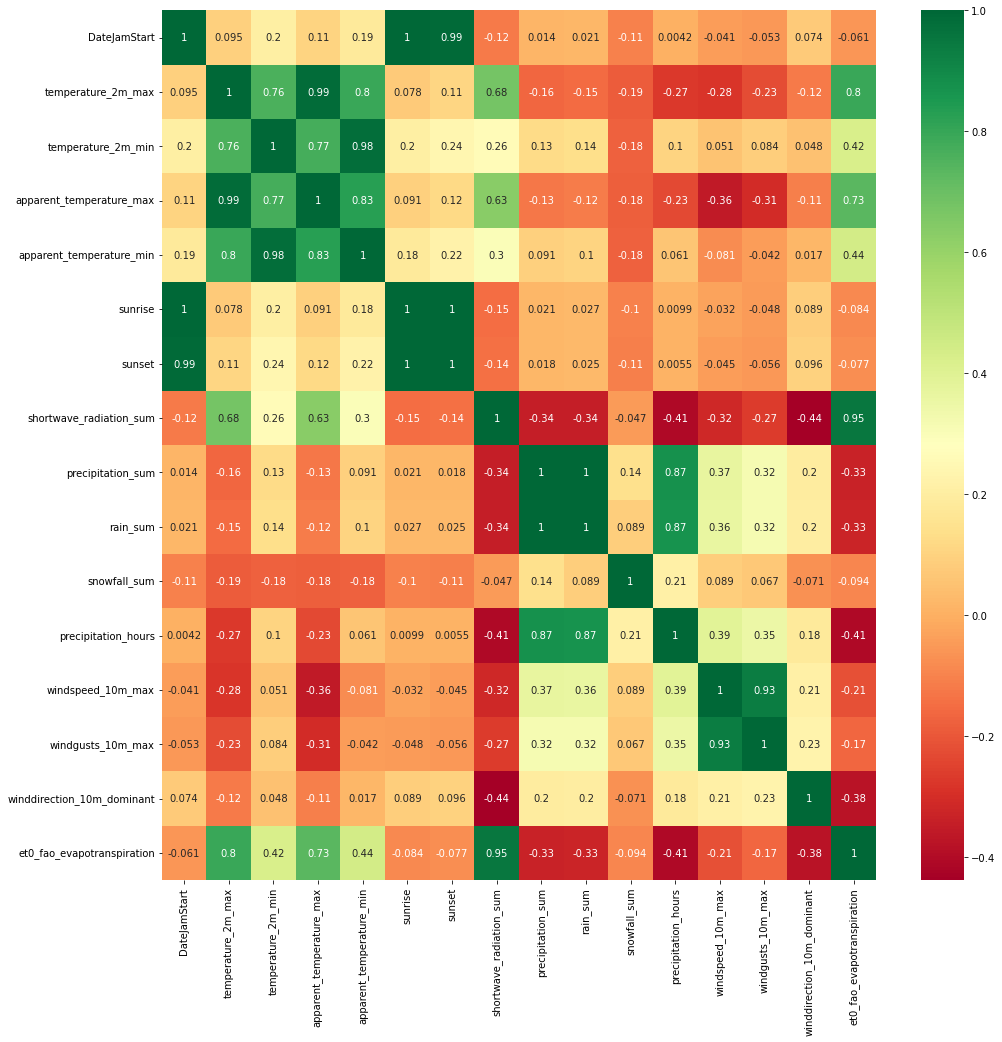

In [22]:
plt.figure(figsize = (16, 16))
figure = sns.heatmap(X.corr(), annot = True, cmap ='RdYlGn')

In [23]:
chi_scores = chi2(X, y)
chi_scores

(array([1.08465693e+04, 6.36273956e+02, 1.51544004e+02, 6.94335744e+02,
        2.39307367e+02, 1.69685121e+04, 1.79755808e+04, 5.18424394e+03,
        4.33377307e+01, 3.97215116e+01, 9.84348486e-01, 4.52668203e+00,
        1.71248229e+02, 7.80185677e+01, 3.13629068e+02, 2.99836854e+03]),
 array([0.00000000e+000, 6.83700573e-139, 1.23776326e-033, 1.68619915e-151,
        1.08409038e-052, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.88446627e-010, 2.36909979e-009, 6.11295843e-001, 1.04002430e-001,
        6.51507706e-038, 1.14415085e-017, 7.87613423e-069, 0.00000000e+000]))

<AxesSubplot:>

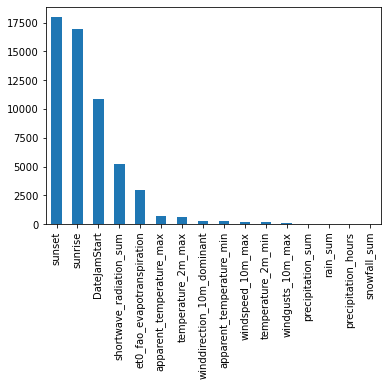

In [24]:
chi_values = pd.Series(chi_scores[0], index = X.columns)
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot.bar()

#### 3.1.2 Assigning the features

In [25]:
X = jams_and_weather[['sunset', 'DateJamStart', 'sunrise']]
y = jams_and_weather['JamClass']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 3.2 Modelling

#### 3.2.1 Random Forest

In [28]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 7, min_samples_split = 2, random_state = 42, 
                                    n_estimators = 5)
forest_clf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=5,
                       random_state=42)

In [29]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6003051106025934

In [30]:
from sklearn.metrics import classification_report

target_names = ['No Traffic Jam', 'Small Traffic Jam', 'Big Traffic Jam']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

                   precision    recall  f1-score   support

   No Traffic Jam       0.65      0.53      0.58       689
Small Traffic Jam       1.00      0.33      0.50         3
  Big Traffic Jam       0.56      0.68      0.62       619

         accuracy                           0.60      1311
        macro avg       0.74      0.51      0.57      1311
     weighted avg       0.61      0.60      0.60      1311

